In [230]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Linear regression - first, without regularization

In [244]:
# we will take five points
n = 6
x = np.array(range(1, n))
print('x: %s' % x)
y = np.array([2, 3, 2, 4, 3])
y = y.astype(np.float32)
print('y: %s' % y)
y_ = x/2 + 1.3

# these are the points and the associated function value, y=f(x)

x: [1 2 3 4 5]
y: [ 2.  3.  2.  4.  3.]


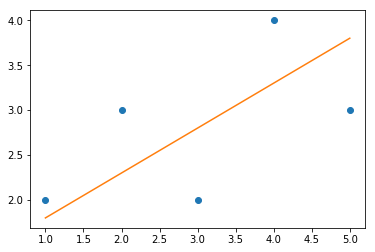

In [245]:
plt.plot(x, y, 'o', x, y_, '-')
plt.show()

# the points somehow can be interpolated by a straight line, 
# so this is the kind of function we are looking for

In [246]:
# actually our f(x) would not be a linear function, like a*x + b, 
# but we would be looking for some quadratic function f(x) = ax**2 + b*x + c

# so here we construct the vector of x-es, where our function would be 
# evaluated as a dot product, f(x) = [1, x, x**2] . [c, b, a]
x_ext = np.array([[1, x, x**2] for x in x])
x_ext = tf.to_float(x_ext)

# obtained x_ext would be actually a tensor of five rows (for each of the x-es)
# and three columns (each being the transpose of [1, x, x**2])
x_ext

<tf.Tensor 'ToFloat_97:0' shape=(5, 3) dtype=float32>

In [250]:
# no bias needed, since it is the first column
# now allocate a TF variable in column vector shape, as many rows as
# the second dimension of x_ext (these will be the [c, b, a] coeffs)
W = tf.Variable(tf.zeros([np.shape(x_ext)[1], 1]), name="weights")

# calculate predicted values for all x-es
y_predicted = tf.matmul(x_ext, W)

# calculate MSE
loss = tf.reduce_sum(tf.squared_difference(tf.to_float(y), y_predicted))

# you can use either of them optimizers; however, 
# the AdamOptimizer (adaptive momentum) would converge faster
#train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)
train_op = tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss)

with tf.Session() as sess:  
    # it is essential that the initialization would be run _after_ the placement of AdamOptimizer
    tf.global_variables_initializer().run()
    
    training_steps = 10000
    for step in range(training_steps):
        sess.run([train_op])
        if step % 1000 == 0:
            print("loss: %s" % sess.run([loss]))            
    # make the weights available outside the session
    wghts = sess.run(W)

loss: [207.90814]
loss: [40.423882]
loss: [19.725145]
loss: [15.751569]
loss: [15.32615]
loss: [15.008891]
loss: [14.645502]
loss: [14.31254]
loss: [14.096675]
loss: [14.01433]


In [251]:
# after computation stops, we see that the loss tends to remain fixed at 14 
# and does not decrease significantly, hence we have overfitting
# Note: actually, this is not entirely correct judgement; we would had to 
#       raise the train and validation curves and observe where the validation
#       does not decrease any longer, but starts to grow (and stop there)

# let's plot the computed weights, that is, our quadratic f(x)
a = [x/100.0 for x in range(100, n*100, 1)]
a_ext = np.array([[1, x, x**2] for x in a])
b = np.matmul(a_ext, wghts)

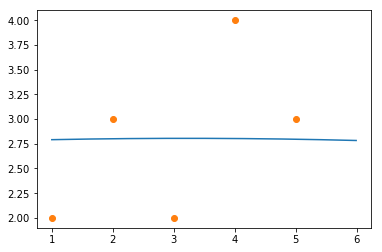

In [252]:
plt.plot(a, b, '-', x, y, 'o')
plt.show()

# you can see that the function tries to minimize the RMS error; coincidentally,
# a horizontal line through the middle of the points does exacty that

# Linear regression - now with regularization

In [253]:
W = tf.Variable(tf.zeros([np.shape(x_ext)[1], 1]), name="weights")

y_predicted = tf.matmul(x_ext, W)
lmbda = tf.constant(100.2)

# we do not like that the function tries to perfectly minimize the error,
# so we add a regularization term: lambda * norm(W)
# thus, the loss function becomes:
#
# loss(x) = sum_i ((y_pred(i) - y)**2) + lambda * norm(W)
# this tries to minimize also the weights chosen
loss = tf.add(
    tf.reduce_sum(tf.squared_difference(tf.to_float(y), y_predicted)),
    tf.multiply(lmbda, tf.tensordot(W, W, [0, 0])[0, 0])
)

#train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)
train_op = tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss)

with tf.Session() as sess:    
    tf.global_variables_initializer().run()
    
    training_steps = 10000
    for step in range(training_steps):
        sess.run([train_op])
        if step % 1000 == 0:
            print("loss: %s" % sess.run([loss]))            
    wghts = sess.run(W)

loss: [207.90845]
loss: [75.286781]
loss: [75.157669]
loss: [75.157616]
loss: [75.157623]
loss: [75.157616]
loss: [75.157616]
loss: [75.157623]
loss: [75.157623]
loss: [75.157616]


In [254]:
a = [x/100.0 for x in range(100, n*100, 1)]
a_ext = np.array([[1, x, x**2] for x in a])
b = np.matmul(a_ext, wghts)

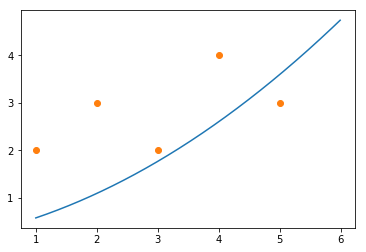

In [256]:
plt.plot(a, b, '-', x, y, 'o')
plt.show()

# this fits more likely the (expected) future points from x=6 onwards